In [13]:
import pytest
import pandas as pd
import numpy as np
from pySODM.models.base import SDEModel

##################################
## Model without stratification ##
##################################

class SIR(SDEModel):

    # state variables and parameters
    state_names = ['S', 'I', 'R']
    parameter_names = ['beta', 'gamma']

    @staticmethod
    def compute_rates(t, S, I, R, beta, gamma):
        """Basic SIR model"""
        return {'S': [beta*(I/(S + I + R)),], 'I': [np.array([gamma]),]}

    @staticmethod
    def apply_transitionings(t, tau, transitionings, S, I, R, beta, gamma):
        S_new = S - transitionings['S'][0]
        I_new = I + transitionings['S'][0] - transitionings['I'][0]
        R_new = R + transitionings['I'][0]
        return S_new, I_new, R_new


def test_SIR_time():

    # Define parameters and initial states
    parameters = {"beta": 0.9, "gamma": 0.2}
    initial_states = {"S": 1_000_000 - 10, "I": 10, "R": 0}
    # Build model
    model = SIR(initial_states, parameters)
    # Simulate using a mixture of int/float
    time = [int(10), float(50.3)]
    output = model.sim(time)
    # Simulate using just one timestep
    output = model.sim(50)
    # Simulate using a list of timesteps
    time = [0, 50]
    output = model.sim(time)

    # Validate
    assert 'time' in list(output.dims.keys())
    np.testing.assert_allclose(output["time"], np.arange(0, 51))
    S = output["S"].values.squeeze()
    assert S[0] == 1_000_000 - 10
    assert S.shape == (51, )
    assert S[-1] < 20_000
    I = output["I"].squeeze()
    assert I[0] == 10
    assert S.shape == (51, )

In [14]:
test_SIR_time()

AttributeError: 'NoneType' object has no attribute 'keys'

In [10]:
# Define parameters and initial states
parameters = {"beta": 0.9, "gamma": 0.2}
initial_states = {"S": [1_000_000 - 10], "I": [10], "R": [0]}
# Build model
model = SIR(initial_states, parameters)
# Simulate using a mixture of int/float
time = [int(10), float(50.3)]
output = model.sim(time)
# Simulate using just one timestep
output = model.sim(50)
# Simulate using a list of timesteps
time = [0, 50]
output = model.sim(time)

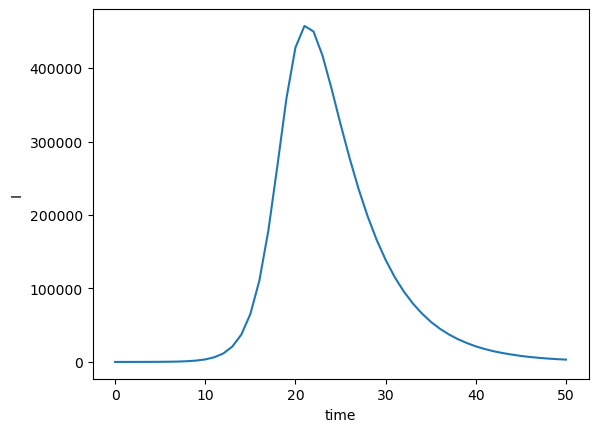

In [12]:
output['I'].plot()